You are an engineer developing a machine learning model to predict the buckling performance of the mono-stiffened panel from Question 5. The model will use two input variables: the panel width W and length L. It is not possible to investigate all possible values of W and L, so they are constrained within the domain specified in the third column of Table 1.
Write Python code to generate 50 Latin hypercube samples for training the model and plot your samples. Note that Latin hypercube sampling produces values in the range [0, 1], so you must scale the samples using the lower and upper bounds from Table 1.

Plate width = [0.1, 0.2]
Plate length = [0.5, 0.8]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from smt.sampling_methods import LHS

(50, 2)


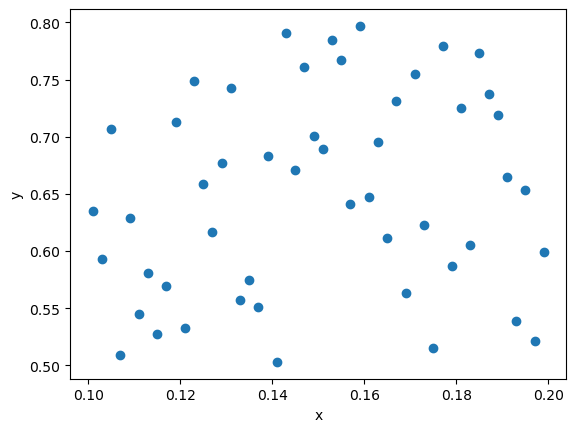

In [7]:
xlimits = np.array([[0.1, 0.2], [0.5, 0.8]])
sampling = LHS(xlimits=xlimits)

num = 50
x = sampling(num)

print(x.shape)

plt.plot(x[:, 0], x[:, 1], "o")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

data = np.array([
    [5.1, 3.5, 0],
    [4.9, 3.0, 1],
    [4.7, 3.2, 0],
    [4.6, 3.1, 1],
    [5.0, 3.6, 0],
    [5.4, 3.9, 1],
    [4.6, 3.4, 0],
    [5.0, 3.0, 1],
    [4.4, 2.9, 0],
    [5.2, 3.7, 1]
])

train, test =train_test_split(data, train_size=0.7, shuffle=False)

print(f'Train dataset: \n {train}')
print(f'Test dataset: \n {test}')


Train dataset: 
 [[5.1 3.5 0. ]
 [4.9 3.  1. ]
 [4.7 3.2 0. ]
 [4.6 3.1 1. ]
 [5.  3.6 0. ]
 [5.4 3.9 1. ]
 [4.6 3.4 0. ]]
Test dataset: 
 [[5.  3.  1. ]
 [4.4 2.9 0. ]
 [5.2 3.7 1. ]]


13. The below code is performing K-fold cross validation and leave-one-out cross validation (LOOCV).
(a) Why does the function cross val score use the negative Mean Absolute Error (-MAE) as the scoring parameter, and not the positive MAE? Think about whether cross val score is trying to maximise or minimise the scoring parameter.
(b) Compare K-fold cross-validation using K=5 and K=1000. How do the computation time and the average Mean Absolute Error (MAE) differ between these two cases?

In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
import numpy as np
import time


# Generate a simple regression dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

# Initialize the linear regression model
model = LinearRegression()
model.fit(X, y)

# Perform K-fold cross-validation
start = time.time()
kfold_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
end = time.time()
kfold_time = end - start;

# Perform LOOCV
loocv = LeaveOneOut()
start = time.time()
loocv_scores = cross_val_score(model, X, y, cv=loocv, scoring='neg_mean_absolute_error')
end = time.time()
kloocv_time = end - start;

# Calculate Mean Absolute Errors (MAE) for K-fold and LOOCV
kfold_avg_score = -np.mean(kfold_scores)
loocv_avg_score = -np.mean(loocv_scores)

# Compare mean MAE for K-fold and LOOCV
print(f"K-fold average MAE: {kfold_avg_score:.4f}")
print(f"LOOCV average MAE: {loocv_avg_score:.4f}")

# Compare computation time for K-fold and LOOCV
print(f"K-fold time: {kfold_time:.4f}")
print(f"LOOCV time: {kloocv_time:.4f}")

K-fold average MAE: 7.9250
LOOCV average MAE: 7.9153
K-fold time: 0.0061
LOOCV time: 0.3191
